# 1.Data preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv(r"D:\Excelr\Assignments\Decision Tree\heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

# 2.EDA

In [7]:
# Check for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

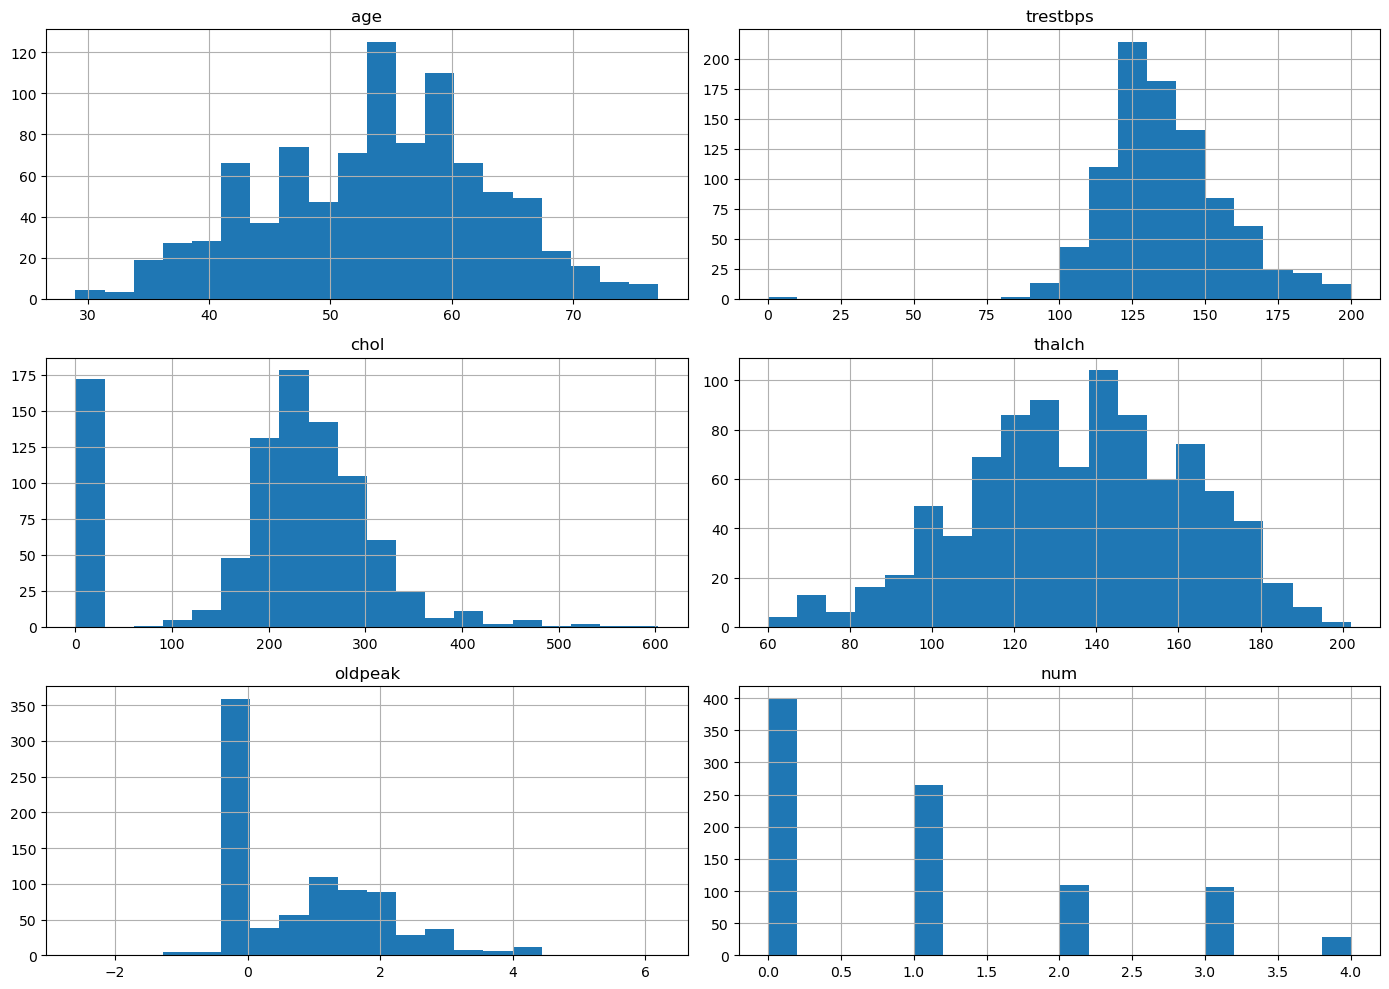

In [8]:
#visualization
df.hist(bins=20,figsize=(14,10))
plt.tight_layout()
plt.show()

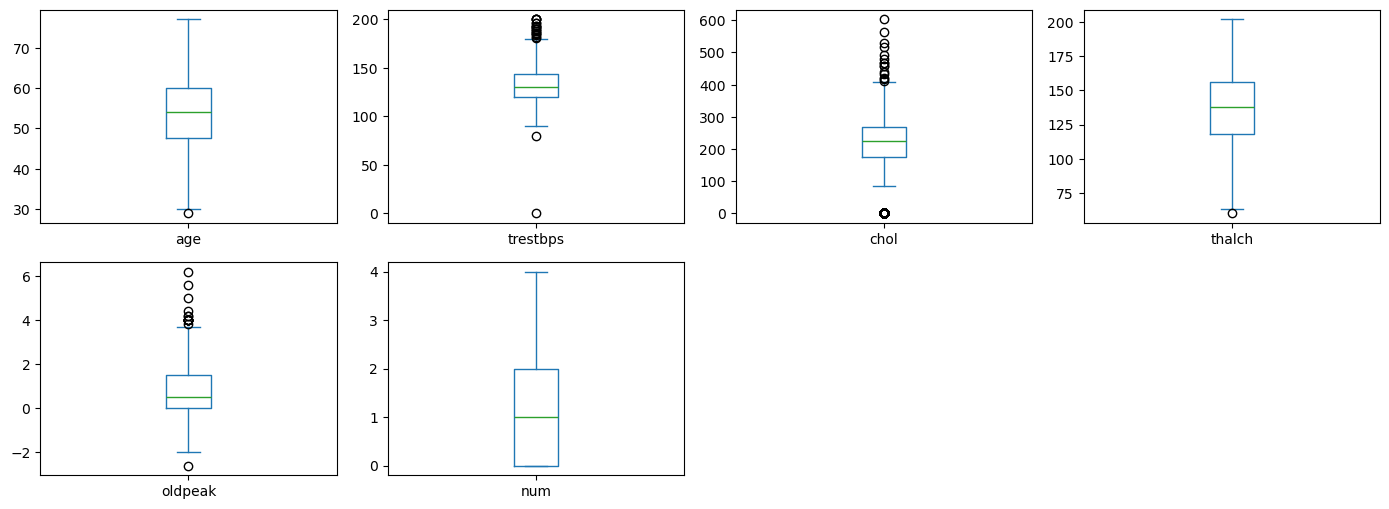

In [9]:
#boxplot for outliers
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(14,10))
plt.tight_layout()
plt.show()


# 3.Feature Engineering

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df.drop(columns='num')  # Replace 'target' with actual column name
y = df['num']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df.drop(columns='num',axis=1)  # Replace 'target' with actual column name
y = df['num']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

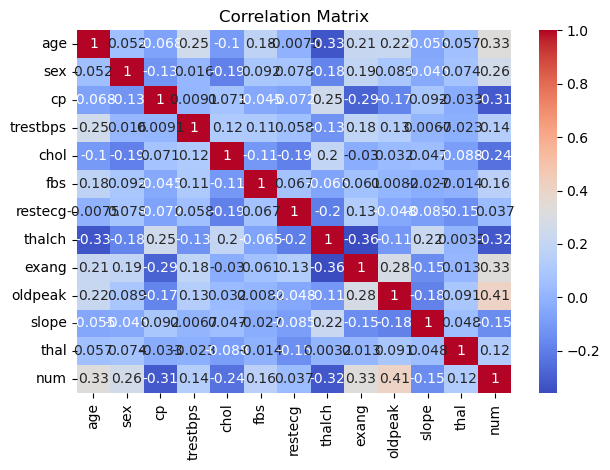

In [80]:
#correlation matrix
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# 4.Decision Tree classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [86]:
#predict and evaluate
y_pred=dt.predict(X_test)
print('\nClassification Report:\n',classification_report(y_test,y_pred))
print('\nconfusion matrix:\n\n',confusion_matrix(y_test,y_pred))

print('\nROC-AUC score:\n',roc_auc_score(y_test,dt.predict_proba(X_test),multi_class='ovr'))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        22
           3       0.09      1.00      0.17        17
           4       0.00      0.00      0.00         6

    accuracy                           0.09       182
   macro avg       0.02      0.20      0.03       182
weighted avg       0.01      0.09      0.02       182


confusion matrix:

 [[ 0  0  0 89  0]
 [ 0  0  0 48  0]
 [ 0  0  0 22  0]
 [ 0  0  0 17  0]
 [ 0  0  0  6  0]]

ROC-AUC score:
 0.5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sam

# 5: Visualize Decision Tree Structure

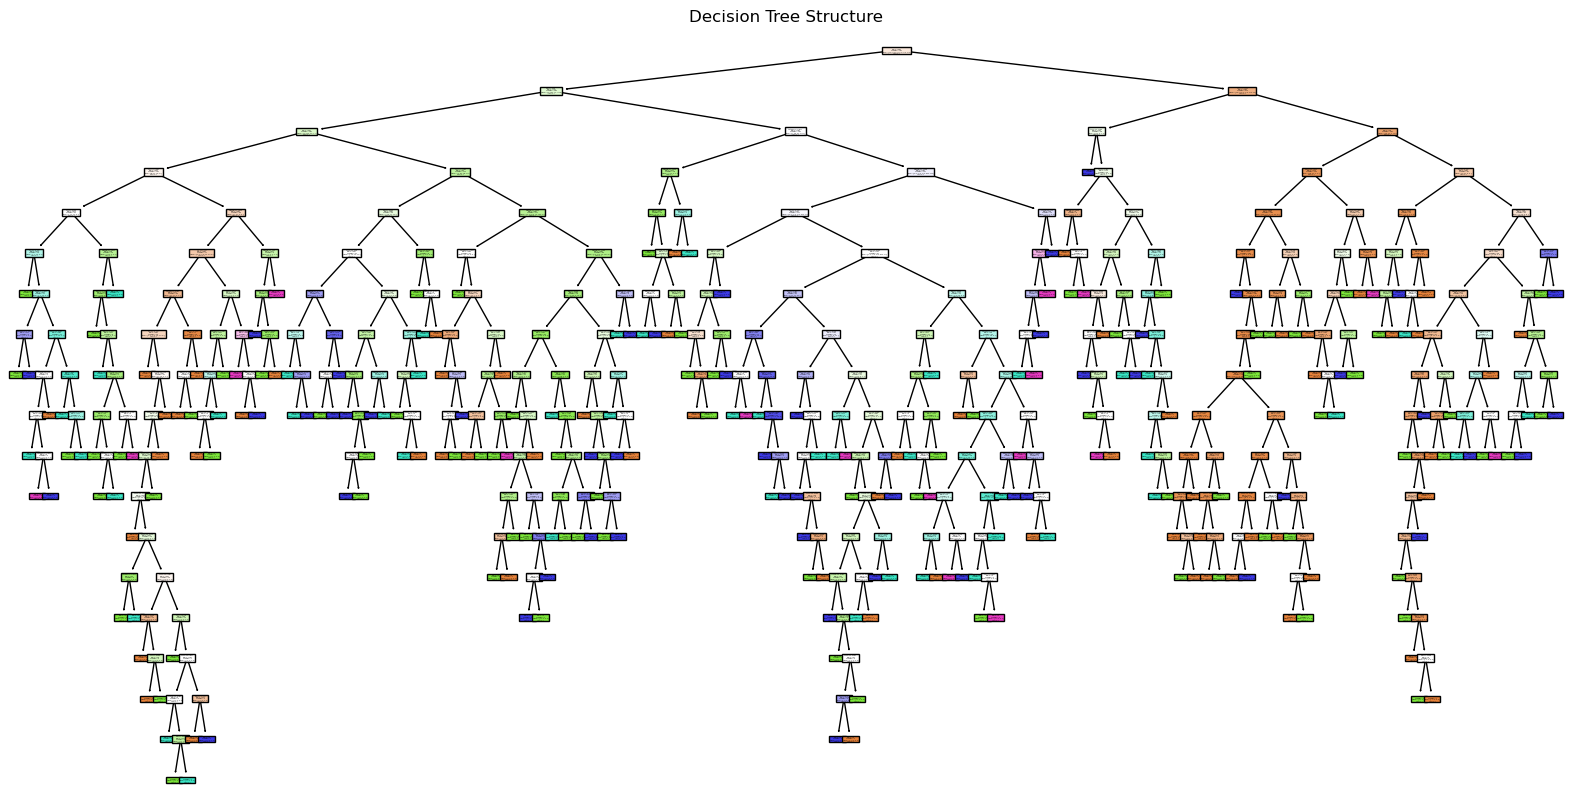

In [90]:
from sklearn.tree import plot_tree
class_names = y.unique().astype(str)  # Convert to string if needed
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=class_names)
plt.title("Decision Tree Structure")
plt.show()

# Step 6: ROC Curve

y_prob shape: (182, 5)
y_test_bin shape: (182, 3)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


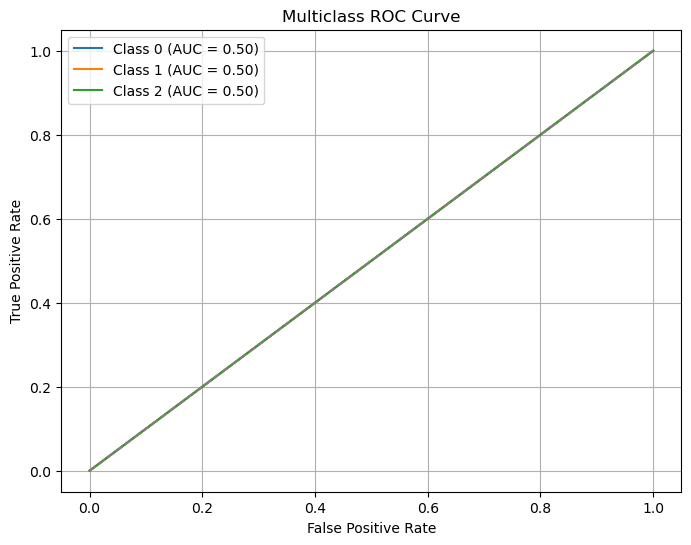

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Ensure y_test is binarized correctly
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels as necessary
n_classes = y_test_bin.shape[1]

# Ensure y_prob contains predicted probabilities (replace `dt` with your model name)
y_prob = dt.predict_proba(X_test)  # Using predict_proba, not predict

# Check if y_prob is 2D
print(f"y_prob shape: {y_prob.shape}")
print(f"y_test_bin shape: {y_test_bin.shape}")

# Initialize dictionaries to store fpr, tpr, and auc for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve for each class
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


# 5.Hyper Parameter tuning**

In [103]:
from sklearn.model_selection import GridSearchCV

# Grid search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test_scaled)
print("Tuned Model Accuracy:", best_model.score(X_test_scaled, y_test))

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Tuned Model Accuracy: 0.554945054945055
